In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import zscore
from sklearn import preprocessing
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data = pd.read_csv('sonar.all-data.csv',names=range(0,61),header=0)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
label_encoder = preprocessing.LabelEncoder()

In [5]:
data[60]=label_encoder.fit_transform(data[60])

In [6]:
data[60].unique()

array([1, 0])

In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [8]:
x=data.iloc[:,0:-1]

In [9]:
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [10]:
y=data.iloc[:,-1]

In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: 60, Length: 207, dtype: int64

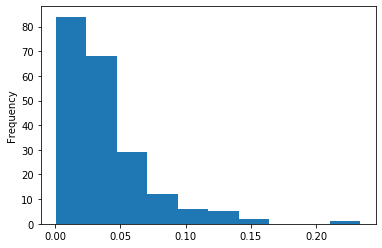

In [12]:
data[1].plot.hist()

In [13]:
data.shape

(207, 61)

In [14]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60      int64
Length: 61, dtype: object

In [15]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [16]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


In [17]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [18]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523,0.463768
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038,0.499894
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100,0.000000
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300,0.000000
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [19]:
pca = PCA(n_components=10)

In [20]:
pca_data = pca.fit_transform(data)

In [21]:
data = pca_data

In [22]:
df_sonardata=pd.DataFrame(data)

In [23]:
df_sonardata.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02
mean,4.907508e-17,6.167906e-17,-3.325306e-17,1.898139e-17,-7.756812e-17,-3.590123e-17,7.662952e-17,2.695107e-17,8.443997e-17,-3.740969e-17
std,7.554872e-01,5.992588e-01,5.334198e-01,3.867546e-01,3.161403e-01,2.806064e-01,2.733410e-01,2.400222e-01,2.145137e-01,1.970723e-01
min,-1.466320e+00,-1.205410e+00,-9.006486e-01,-9.262088e-01,-7.383297e-01,-7.072585e-01,-7.266118e-01,-4.981673e-01,-5.969029e-01,-5.516728e-01
25%,-6.076813e-01,-4.508653e-01,-5.325761e-01,-2.348144e-01,-1.829852e-01,-1.611967e-01,-1.663696e-01,-1.571025e-01,-1.440981e-01,-1.238456e-01
50%,-3.621157e-03,-1.119066e-01,2.319238e-01,-1.426353e-02,-2.142969e-02,-1.165212e-02,-4.950756e-05,-3.281378e-02,-2.763746e-04,-2.325222e-02
75%,5.105729e-01,4.354816e-01,3.856731e-01,2.133229e-01,2.236881e-01,1.588900e-01,1.541636e-01,1.539735e-01,1.245660e-01,9.443425e-02
max,1.793227e+00,1.386395e+00,1.030639e+00,1.098125e+00,7.980937e-01,8.216772e-01,7.336311e-01,7.062182e-01,6.429734e-01,5.845269e-01


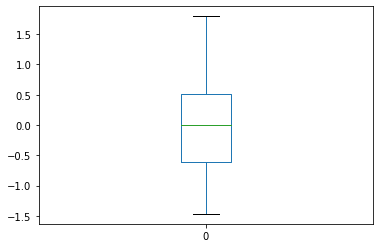

In [24]:
df_sonardata[0].plot.box()

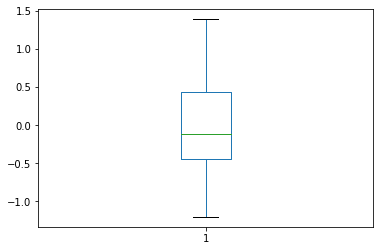

In [25]:
df_sonardata[1].plot.box()

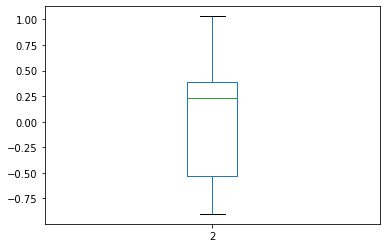

In [26]:
df_sonardata[2].plot.box()

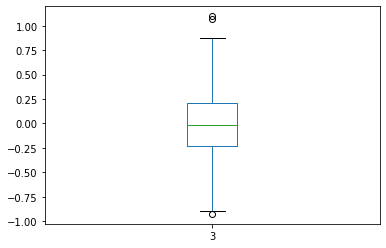

In [27]:
df_sonardata[3].plot.box()

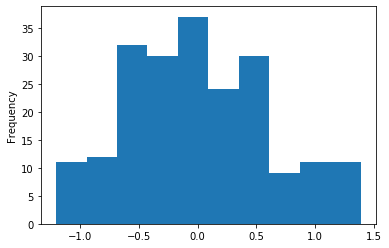

In [28]:
df_sonardata[1].plot.hist()

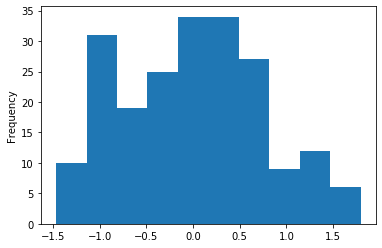

In [29]:
df_sonardata[0].plot.hist()

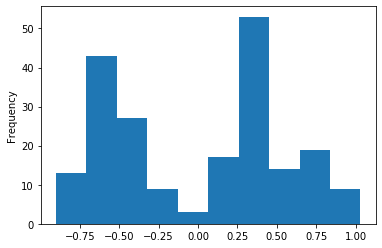

In [30]:
df_sonardata[2].plot.hist()

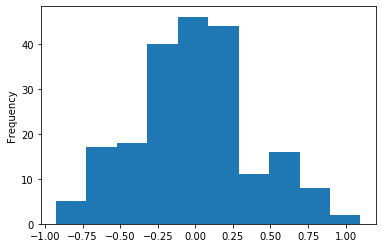

In [31]:
df_sonardata[3].plot.hist()

In [32]:
z=np.abs(stats.zscore(df_sonardata))
print(z)

[[1.11258351 1.86952364 1.00458663 ... 0.34042483 1.80892263 0.11411421]
 [0.30820238 1.53902091 0.21257435 ... 1.90398285 0.6877623  0.45192216]
 [1.245602   1.20597052 0.26218141 ... 2.94943678 0.53262796 2.28469168]
 ...
 [0.27503656 2.01089921 0.45216989 ... 1.25283882 0.89658912 0.50666123]
 [0.1799595  1.74759429 0.50635799 ... 0.37487537 0.25272936 0.20165158]
 [0.18395046 1.60563681 0.48819034 ... 0.6824266  0.22262534 0.47458317]]


In [33]:
threshold=3
print(np.where(z>3))

(array([170]), array([8]))


In [34]:
print(z[170][8])

3.0046205313706573


In [35]:
df_sonardata

,0,1,2,3,4,5,6,7,8,9
0,-0.838510,1.117619,-0.534571,0.828446,0.385531,0.199742,-0.126386,-0.081512,0.387100,0.022434
1,-0.232280,0.920041,-0.113117,0.231334,0.781731,-0.058405,-0.627502,0.455893,0.147178,0.088846
2,0.938761,0.720941,-0.139515,-0.024041,-0.428270,0.418906,0.314214,0.706218,-0.113980,-0.449161
3,0.041834,0.295764,-0.439998,0.633978,0.305331,0.149665,-0.334937,-0.028381,0.072908,0.131271
4,-0.478690,0.992633,-0.509493,0.802801,0.651845,0.421335,-0.033549,-0.056648,0.125249,-0.172855
...,...,...,...,...,...,...,...,...,...,...
202,-0.049414,-1.082417,0.279792,0.267029,-0.044025,0.067901,0.073569,-0.190824,0.151742,0.008394
203,0.127141,-1.205410,0.264906,0.201577,0.087476,-0.076092,0.170090,-0.253747,0.234657,-0.094225
204,0.207284,-1.202135,0.240613,0.249562,0.002355,-0.074248,0.151211,-0.299982,0.191865,-0.099607
205,-0.135628,-1.044729,0.269448,0.203167,-0.202841,-0.082416,-0.000799,-0.089761,0.054083,-0.039644


In [36]:
df_sonardata

,0,1,2,3,4,5,6,7,8,9
0,-0.838510,1.117619,-0.534571,0.828446,0.385531,0.199742,-0.126386,-0.081512,0.387100,0.022434
1,-0.232280,0.920041,-0.113117,0.231334,0.781731,-0.058405,-0.627502,0.455893,0.147178,0.088846
2,0.938761,0.720941,-0.139515,-0.024041,-0.428270,0.418906,0.314214,0.706218,-0.113980,-0.449161
3,0.041834,0.295764,-0.439998,0.633978,0.305331,0.149665,-0.334937,-0.028381,0.072908,0.131271
4,-0.478690,0.992633,-0.509493,0.802801,0.651845,0.421335,-0.033549,-0.056648,0.125249,-0.172855
...,...,...,...,...,...,...,...,...,...,...
202,-0.049414,-1.082417,0.279792,0.267029,-0.044025,0.067901,0.073569,-0.190824,0.151742,0.008394
203,0.127141,-1.205410,0.264906,0.201577,0.087476,-0.076092,0.170090,-0.253747,0.234657,-0.094225
204,0.207284,-1.202135,0.240613,0.249562,0.002355,-0.074248,0.151211,-0.299982,0.191865,-0.099607
205,-0.135628,-1.044729,0.269448,0.203167,-0.202841,-0.082416,-0.000799,-0.089761,0.054083,-0.039644


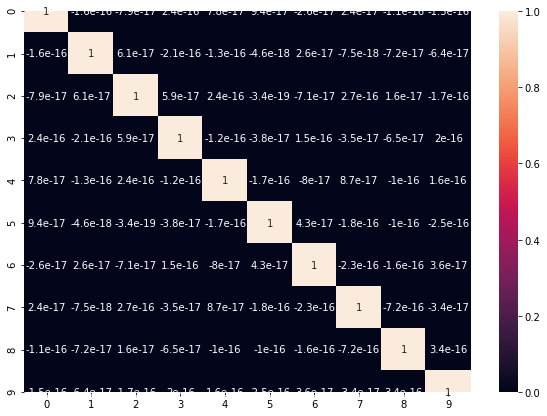

In [37]:
corr_hmap=df_sonardata.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [38]:
df_sonardata.skew()

0    0.204678
1    0.329295
2    0.003135
3    0.178562
4    0.127880
5    0.199260
6    0.067243
7    0.604875
8    0.061420
9    0.305041
dtype: float64

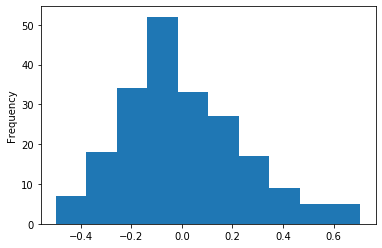

In [39]:
df_sonardata[7].plot.hist()

In [40]:
df_sonardata.skew()

0    0.204678
1    0.329295
2    0.003135
3    0.178562
4    0.127880
5    0.199260
6    0.067243
7    0.604875
8    0.061420
9    0.305041
dtype: float64

In [41]:
x=df_sonardata

In [42]:
x

,0,1,2,3,4,5,6,7,8,9
0,-0.838510,1.117619,-0.534571,0.828446,0.385531,0.199742,-0.126386,-0.081512,0.387100,0.022434
1,-0.232280,0.920041,-0.113117,0.231334,0.781731,-0.058405,-0.627502,0.455893,0.147178,0.088846
2,0.938761,0.720941,-0.139515,-0.024041,-0.428270,0.418906,0.314214,0.706218,-0.113980,-0.449161
3,0.041834,0.295764,-0.439998,0.633978,0.305331,0.149665,-0.334937,-0.028381,0.072908,0.131271
4,-0.478690,0.992633,-0.509493,0.802801,0.651845,0.421335,-0.033549,-0.056648,0.125249,-0.172855
...,...,...,...,...,...,...,...,...,...,...
202,-0.049414,-1.082417,0.279792,0.267029,-0.044025,0.067901,0.073569,-0.190824,0.151742,0.008394
203,0.127141,-1.205410,0.264906,0.201577,0.087476,-0.076092,0.170090,-0.253747,0.234657,-0.094225
204,0.207284,-1.202135,0.240613,0.249562,0.002355,-0.074248,0.151211,-0.299982,0.191865,-0.099607
205,-0.135628,-1.044729,0.269448,0.203167,-0.202841,-0.082416,-0.000799,-0.089761,0.054083,-0.039644


In [43]:
scale = MinMaxScaler()

In [44]:
x=scale.fit_transform(x)

In [45]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.22,random_state=42)

In [46]:
lr = LogisticRegression()

In [47]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

1.0
[[28  0]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        18

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[28  0]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        18

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



In [50]:
svc = SVC()

In [51]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[28  0]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        18

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [52]:
rf = RandomForestClassifier()

In [53]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[28  0]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        18

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
